# Project for customer segmentation

## Case Study :- In this project I will be working be working on the data provided by online Shopping site to identify the potential customer base to sell the product.


### For this project I will be using K-means clustering to make cluster for the potential customers. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_cust=pd.read_csv('Cust_Segmentation.csv')
df_cust.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
# Changing income in Rs
df_cust['Income']=df_cust['Income']*70
df_cust.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,1330,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,7000,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,3990,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,1330,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,17710,9.308,8.908,0.0,NBA008,7.2


In [4]:
df_cust.rename(columns={'Income':'Monthly Income(Rs.)'},inplace=True)
df_cust.rename(columns={'Edu':'Education'},inplace=True)

In [5]:
df_cust=df_cust.drop(['Address','Years Employed',],axis=1)
# dropping as it does not help in the clustering of the data

In [6]:
df_cust.head()

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,1330,0.124,1.073,0.0,6.3
1,2,47,1,7000,4.582,8.218,0.0,12.8
2,3,33,2,3990,6.111,5.802,1.0,20.9
3,4,29,2,1330,0.681,0.516,0.0,6.3
4,5,47,1,17710,9.308,8.908,0.0,7.2


In [7]:
df_cust.dropna(axis=1)#dropping null columns
df_cust.shape

(850, 8)

### Data Cleaning is done now I will plot graphs to represent data clearly. 

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

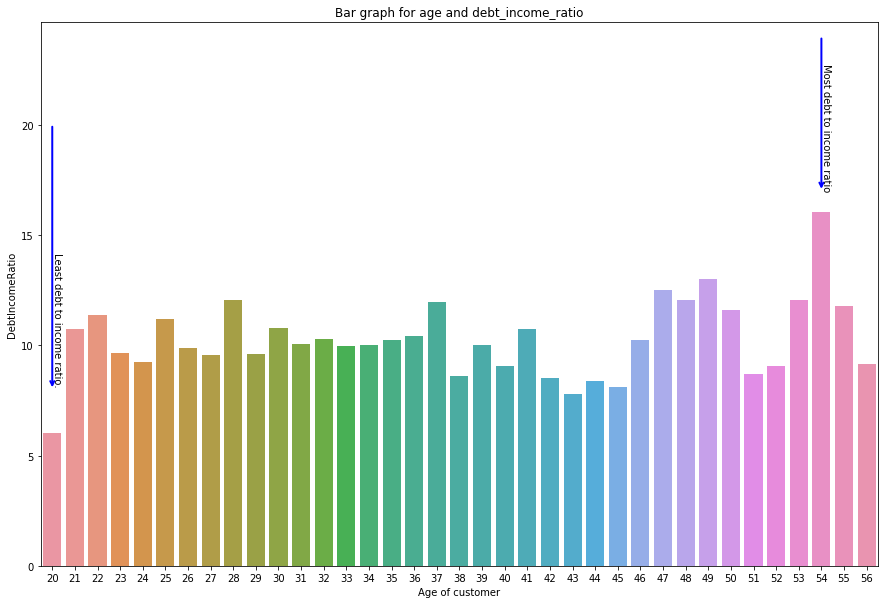

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df_cust.Age, df_cust.DebtIncomeRatio, errwidth=0)
plt.xlabel('Age of customer')
plt.title('Bar graph for age and debt_income_ratio')
plt.annotate('',
            xy=(0,8),  #to place the head
            xytext=(0,20), # to place the tail
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2)) 
plt.annotate('Least debt to income ratio. ',
            xy=(0,8),
            rotation=270,
            va='bottom',  #text to be vertically bottom alligned
            ha='left',  #text to be horizontally left alligned  
            ) 
plt.annotate('',
            xy=(34,17),
            xytext=(34,24),
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2))
plt.annotate('Most debt to income ratio',
            xy=(34,17),
            rotation=270,
            va='bottom',
            ha='left',
            )
plt.show()

## Now using scatter plot to see the cluster of data. 

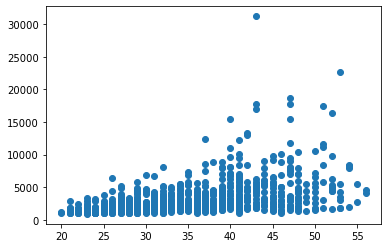

In [10]:
plt.scatter(df_cust['Age'],df_cust['Monthly Income(Rs.)'])

## Now clustering the data set

### First we need to Normalize the data set.
### For that we will use standard scaler function.

In [11]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler


In [12]:
# Normalizing the data helps us to interpret features with different magnitude and distributions equally.
X=df_cust.values[:,1:] #creating the array of df_cust values
X=np.nan_to_num(X) #replacing NAN with 0 and Zero with some high value
cluster_df=StandardScaler().fit_transform(X) # the custer_df contains the data with equal distributions
x1=X
cluster_df

array([[ 0.74291541,  0.31212243, -0.71845859, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  1.38432469, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.26803233, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -0.74441888, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938, -0.484816  , ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  0.44975434, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

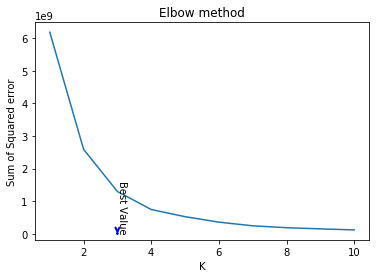

In [13]:
# now applying elbow method for best K or clus_num value
wcss=[] #clusters and storing the value of the intertia_ property (WCSS) every time.

for i in range (1,11):
    
    k_means=KMeans(init='k-means++',n_clusters=i,n_init=12,)# n_init will define the number of time the kmeans algorithm will run with different centroid seeds.
# it will choose the best output of  n_init consecutive in terms of inertia.
    k_means.fit(x1)
    
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11) , wcss)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.title('Elbow method')
plt.annotate('',
            xy=(3,4),
            xytext=(3,6),
            
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2))
plt.annotate('Best Value',
            xy=(3,4),
            rotation=270,
            va='bottom',
            ha='left',
            )
plt.show()




In [14]:
# so our best value for k is 3
k_means=KMeans(init='k-means++',n_clusters=3,n_init=12,)# n_init will define the number of time the kmeans algorithm will run with different centroid seeds.
# it will choose the best output of  n_init consecutive in terms of inertia.
k_means.fit(X)
    
labels=k_means.labels_
labels

array([1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [15]:
df_cust['Labels']=labels
df_cust.head()    

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,1330,0.124,1.073,0.0,6.3,1
1,2,47,1,7000,4.582,8.218,0.0,12.8,0
2,3,33,2,3990,6.111,5.802,1.0,20.9,1
3,4,29,2,1330,0.681,0.516,0.0,6.3,1
4,5,47,1,17710,9.308,8.908,0.0,7.2,2


In [16]:
#grouping according to clusters
df_cust.groupby('Labels').mean()

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,401.777778,41.516667,1.983333,5983.833333,3.106233,5.752472,0.173611,10.538333
1,432.123853,32.990826,1.611621,2195.688073,1.044888,2.133950,0.283088,10.132416
2,421.625000,45.375000,2.687500,16506.875000,6.113625,11.619313,0.333333,7.650000


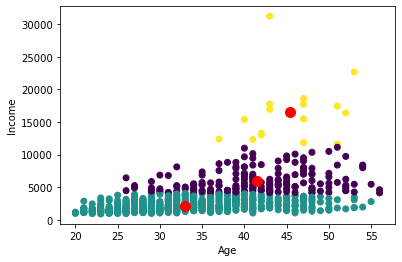

In [22]:
plt.scatter(X[:,0], X[:,2],c=labels.astype(np.float))
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], s=100, c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [26]:
#cluster1 values
df_cust.loc[df_cust['Labels'] == 0]

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
1,2,47,1,7000,4.582,8.218,0.0,12.8,0
5,6,40,1,5670,0.998,7.831,NaN,10.9,0
7,8,42,3,4480,0.279,3.945,0.0,6.6,0
9,10,47,3,8050,0.653,3.947,0.0,4.0,0
10,11,44,3,6160,0.285,5.083,1.0,6.1,0
...,...,...,...,...,...,...,...,...,...
801,802,48,1,7070,1.875,4.589,0.0,6.4,0
808,809,45,1,4340,2.437,6.863,0.0,15.0,0
825,826,32,2,8120,4.027,2.585,NaN,5.7,0
841,842,29,3,4410,0.572,2.893,0.0,5.5,0


In [27]:
#cluster2 values
df_cust.loc[df_cust['Labels']==1]

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,1330,0.124,1.073,0.0,6.3,1
2,3,33,2,3990,6.111,5.802,1.0,20.9,1
3,4,29,2,1330,0.681,0.516,0.0,6.3,1
6,7,38,2,3920,0.442,0.454,0.0,1.6,1
8,9,26,1,1260,0.575,2.215,NaN,15.5,1
...,...,...,...,...,...,...,...,...,...
844,845,41,1,3010,0.694,1.198,0.0,4.4,1
845,846,27,1,1820,0.548,1.220,NaN,6.8,1
846,847,28,2,2380,0.359,2.021,0.0,7.0,1
847,848,25,4,1260,2.802,3.210,1.0,33.4,1


In [32]:
# cluster 3 values
df_cust.loc[df_cust['Labels']==2]

,Customer Id,Age,Education,Monthly Income(Rs.),Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
4,5,47,1,17710,9.308,8.908,0.0,7.2,2
43,44,37,5,12390,0.888,9.555,0.0,5.9,2
198,199,47,3,15470,15.792,23.104,1.0,17.6,2
207,208,43,1,16940,1.636,4.656,0.0,2.6,2
245,246,47,1,11830,0.349,3.369,NaN,2.2,2
360,361,42,4,13020,2.404,4.292,0.0,3.6,2
443,444,51,2,17430,4.273,15.149,0.0,7.8,2
454,455,51,2,11620,0.821,18.269,0.0,11.5,2
461,462,41,3,12320,11.359,5.009,1.0,9.3,2
532,533,43,4,31220,16.031,12.959,1.0,6.5,2


In [33]:
df_cust.loc[df_cust['Labels']==2].shape

(16, 9)